In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LoopStructural import GeologicalModel
from LoopStructural.visualisation.model_visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_duplex
import matplotlib.pyplot as plt
%matplotlib inline
# %load_ext snakeviz

In [2]:
data, boundary_points = load_duplex()

In [3]:
# splay_region = lambda pos : pos[:,0] < (-4.5-model.origin[0])/model.scale_factor
                                         
splay_region = lambda pos : np.logical_or(pos[:,0] < (-6.5-model.origin[0])/model.scale_factor, pos[:,0] 
                                          > (5-model.origin[0])/model.scale_factor)

In [4]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)


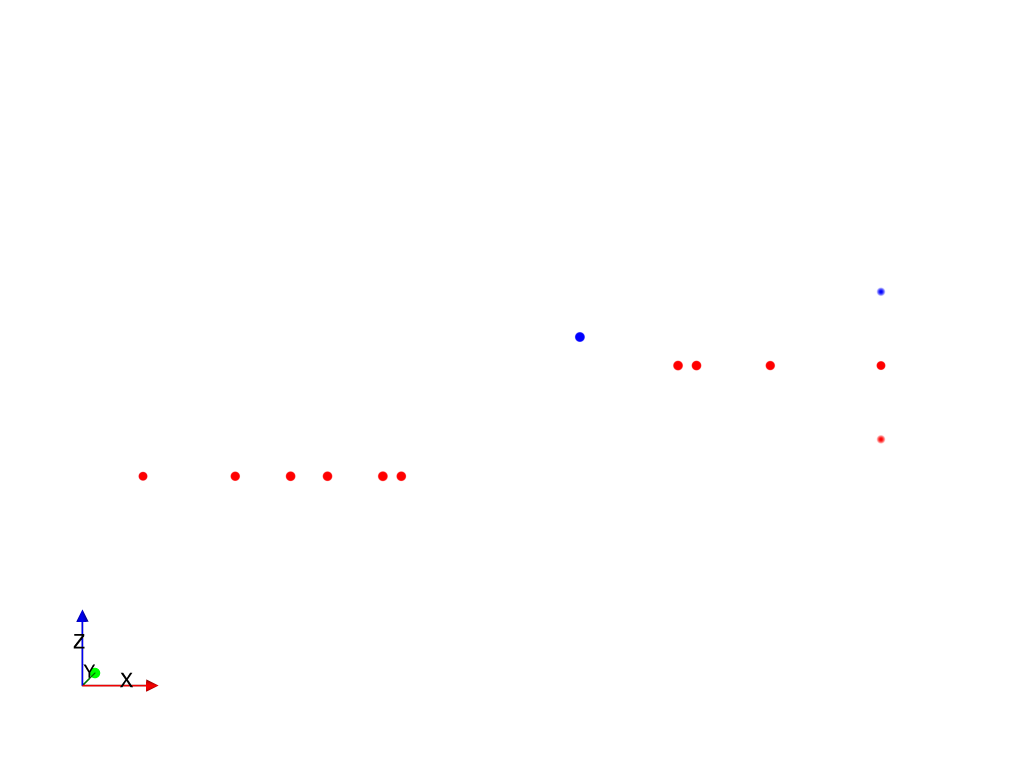

'fault_data.png'

In [5]:
viewer = LavaVuModelViewer(model)

viewer.add_points(model.data[np.logical_and(data['feature_name']=='fault2',data['coord']==0)][['X','Y','Z']],
                  name='f1',pointsize=10,colour='red')

# viewer.add_data(fault1['feature'][0],pointsize=20)
viewer.add_points(model.data[np.logical_and(data['feature_name']=='fault1',data['coord']==0)][['X','Y','Z']],
                  name='f2',pointsize=10,colour='blue')
# viewer.add_data(fault2['feature'][0])
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_data.png')

In [6]:
# from LoopStructural.modelling.features import LambdaGeologicalFeature
# def evaluate_value(xyz):
#     xyz =fault1.apply_to_points(xyz)
#     return fault1.
# testsplay = LambdaGeologicalFeature()

In [7]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:],rescale=False)
model.set_model_data(data)
fault1 = model.create_and_add_fault('fault2',
                                    -1.2,
                                    nelements=1e4,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
#                                     precon=precon,
                                    buffer=np.array([1,0.3,0.3]),
                                    regularisation=[2.,.4,.4],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
# #                                                                         region=interpolation_region
                                    force_mesh_geometry=True,
                                    steps=10,
                                    cpw=10
                                   )
# splay_region = lambda pos : np.logical_or(fault1['feature'].apply_to_points(pos)[:,0] < (-4.5-model.origin[0])/model.scale_factor, 
#                                           fault1['feature'].apply_to_points(pos)[:,0] > (4.5-model.origin[0])/model.scale_factor)
# model.update()
fault2 = model.create_and_add_fault('fault1',
                                    -1.2,
                                    nelements=4000,
                                    solver='lu',
                                    interpolatortype='FDI',
                                   damp = True,
                                    splayregion=splay_region,
                                    splay = fault1,
                                    regularisation=[1.,.5,.5],
                                    gxxgy=4.,
                                    gxxgz=4.,
                                    gyxgz=4.,
# #                                     precon=precon,
                                    buffer=np.array([1.6,.2,0.3]),
                                    force_mesh_geometry=True,
#                                                                         region=interpolation_region
                                    steps=10,
                                    cpw=10,
                                    overprints=['fault2']
                                   )
# model.update()
strati = model.create_and_add_foliation('strati',
                                        solver='lu',
                                        interpolatortype='FDI', 
                                        nelements=1e3,
                                        damp=True,
                                        buffer=2.
                                       )
model.update()

  0%|          | 0/7 [00:00<?, ?it/s]


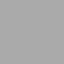

In [8]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,20,100])
# viewer.add_vector_field(strati['feature'])#,locations=nodes2)#,model.regular_grid((25,25,12)))
viewer.add_isosurface(model['fault2'],value=0)
viewer.add_isosurface(model['fault1'],value=0)

viewer.add_scalar_field(strati,cmap='tab20')
# viewer.lv.rotatex(-90)
# viewer.lv['xmin'] = -1
# viewer.lv['ymin'] = -1
# viewer.lv['zmin'] = -1
# viewer.lv['xmax'] = 1
# viewer.lv['ymax'] = 1
# viewer.lv['zmax'] = 1
# viewer.lv['border'] = 0
# viewer.lv.image('fault_duplex_scalar_field.png')
viewer.interactive()

### Figure for Fault 1 showing interpolation nodes for fault 2


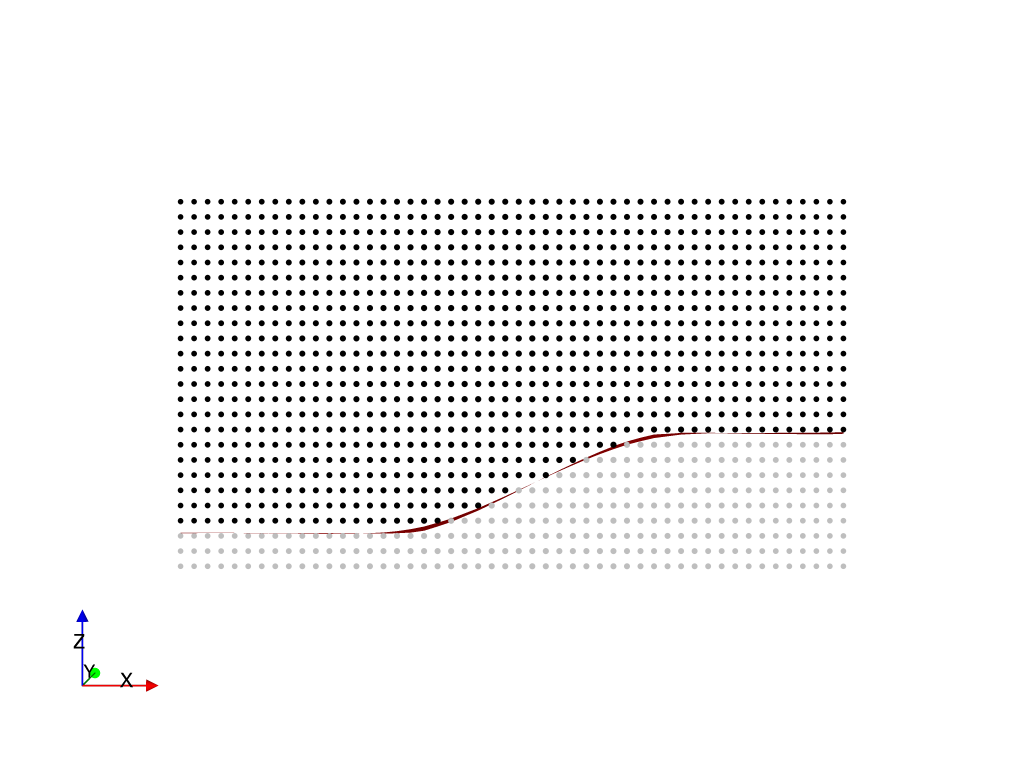

In [9]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
#                       voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
p1 = viewer.lv.points('nodes2',pointsize=6,colour='grey')
p1.vertices(model.rescale(nodes[~fault1.evaluate(nodes),:],inplace=False))
nodes  = nodes[fault1.evaluate(nodes),:]
p = viewer.lv.points('nodes',pointsize=6,colour='black')
p.vertices(model.rescale(nodes,inplace=False))
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

# viewer.add_vector_field(fault1['feature'][1])#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('points_before_fault.png')
viewer.lv.display()

### Figure showing fault 1 displacement field


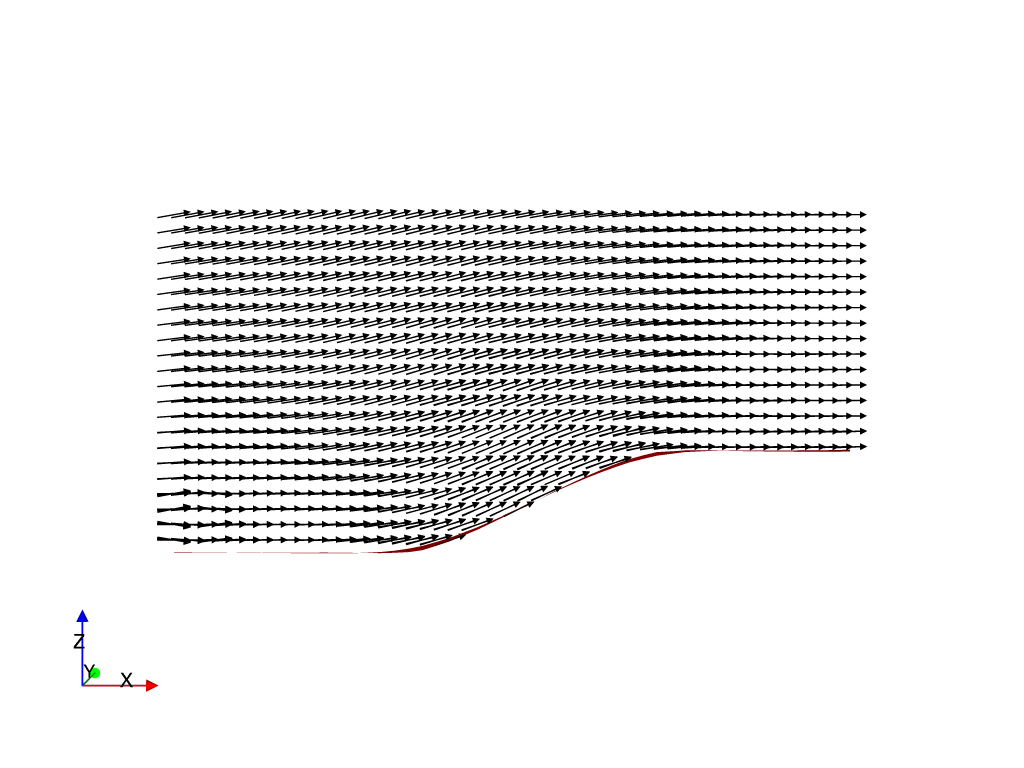

'fault1_displacement_vectors.png'

In [10]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
#                       voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
# nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
# nodes  = nodes[fault1['feature'].evaluate(nodes),:]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

viewer.add_vector_field(fault1[1],locations=nodes)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -2
viewer.lv['ymin'] = -2
viewer.lv['zmin'] = -2
viewer.lv['xmax'] = 2
viewer.lv['ymax'] = 2
viewer.lv['zmax'] = 2
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_displacement_vectors.png')
# viewer.interactive()

### Figure for fault 2 surfaces


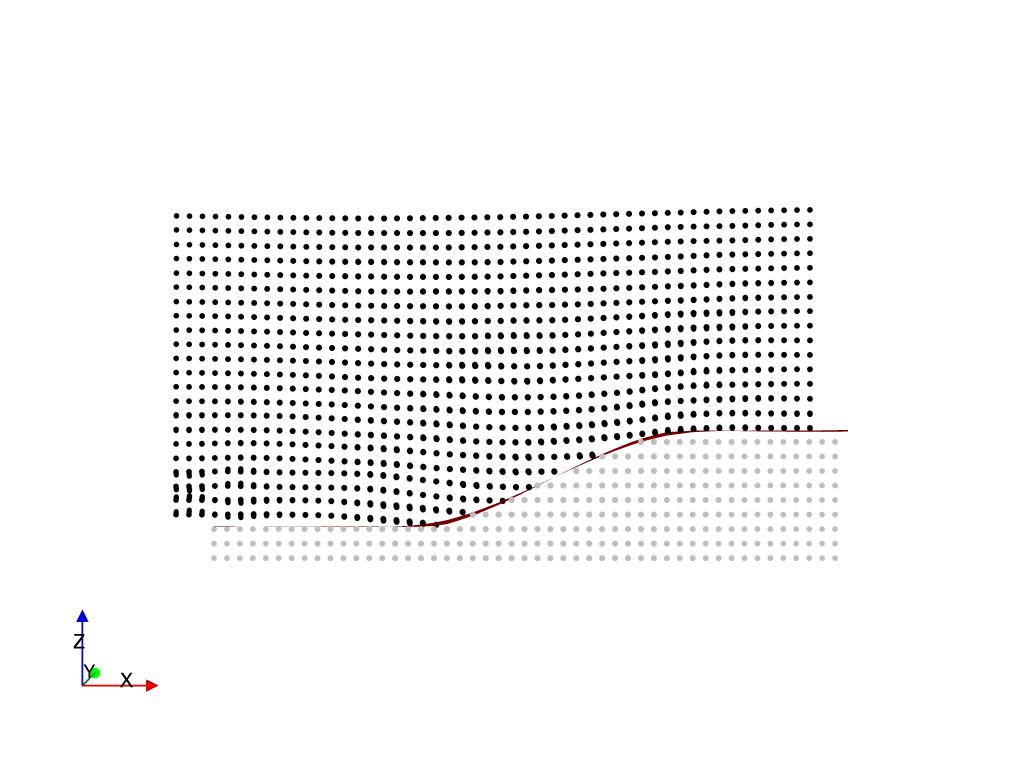

'fault1_point_displaced.png'

In [11]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
#                       voxet=model.voxet()
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes

p1 = viewer.lv.points('nodes',pointsize=6,colour='grey')
p1.vertices(model.rescale(nodes[~fault1.evaluate(nodes),:],inplace=False))
nodes  = nodes[fault1.evaluate(nodes),:]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
nodes = fault1.apply_to_points(nodes)
p = viewer.lv.points('nodes_faulted',pointsize=6,colour='black')
p.vertices(model.rescale(nodes,inplace=False))
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

# viewer.add_vector_field(fault1['feature'][1])#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault1_point_displaced.png')

### Fault 2 displacement vectors

In [12]:
tmp = fault2[1].faults

In [13]:
fault2[1].faults  = tmp
fault2[0].faults  = tmp


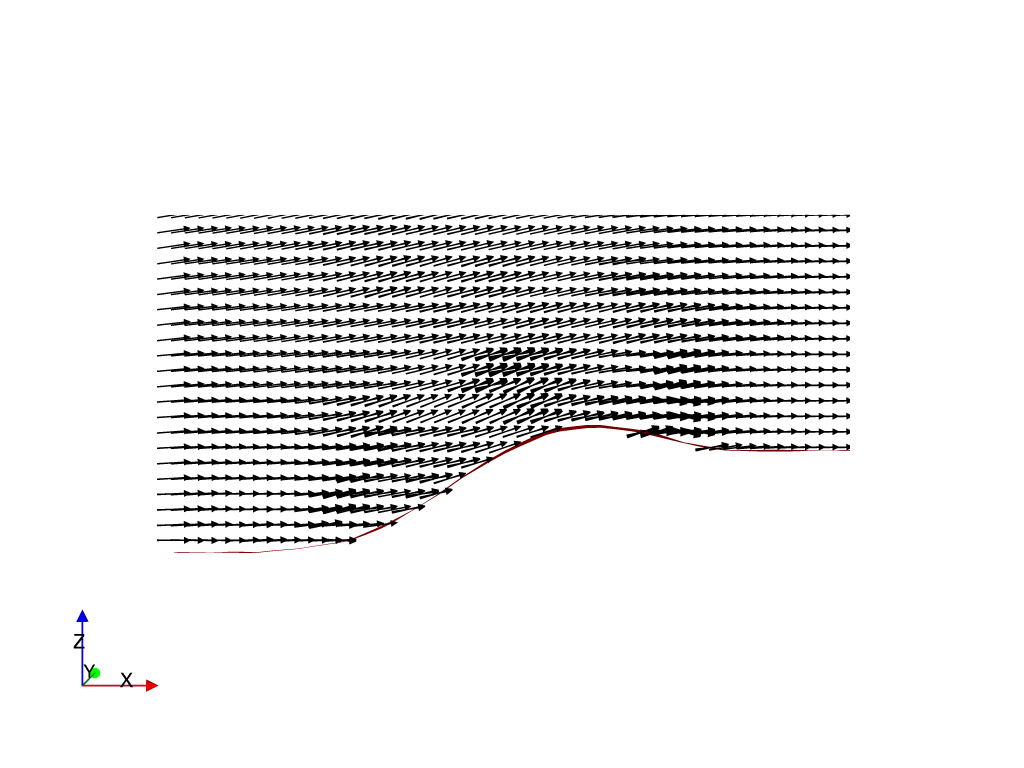

'fault2_displacement_vectors.png'

In [14]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault2,
                      isovalue=0,
                     )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet()
#                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes2 = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
nodes2  = nodes2[fault2.evaluate(nodes2),:]
nodes2 = nodes2#[::50]
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
# nodes = fault2['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted2',pointsize=3,colour='blue')
# p.vertices(nodes)

viewer.add_vector_field(fault2[1],locations=nodes2)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
# viewer.interactive()
viewer.lv.display()
viewer.lv.image('fault2_displacement_vectors.png')

### Figure showing both node movements

In [15]:
fault1[0].faults

[]


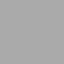

'points_both_fault.png'

In [20]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
                      isovalue=0,
                     )
# fault2['feature'][0].faults = []#fault2['feature'][1].faults
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
#                       voxet=model.voxet(),
#                       name='f2wof1'
#                      )
# fault2['feature'][0].faults = fault2['feature'][1].faults
viewer.add_isosurface(fault2,
                      isovalue=0,
                      )
# viewer.add_isosurface(fault1['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t1'
#                      )
# viewer.add_isosurface(fault2['feature'],
#                       isovalue=0,
# #                       voxet=model.voxet()
#                       name='t2'
#                      )
nodes = model.regular_grid()#fault2['feature'][0].get_interpolator().support.nodes
p1 = viewer.lv.points('nodes',pointsize=6,colour='grey')
p1.vertices(model.rescale(nodes[~fault1.evaluate(nodes),:],inplace=False))
nodes  = nodes[fault1.evaluate(nodes),:]
# viewer.add_vector_field(fault2['feature'][1],locations=nodes)
# p = viewer.lv.points('nodes',pointsize=3,colour='red')
# p.vertices(nodes)
# nodes = fault1['feature'].apply_to_points(nodes)
# p = viewer.lv.points('nodes_faulted',pointsize=3,colour='blue')
# p.vertices(nodes)
nodes = fault1.apply_to_points(nodes)
# viewer.lv.display()
p = viewer.lv.points('nodes_faulted3',pointsize=6,colour='grey')

p.vertices(model.rescale(nodes[~fault2.evaluate(nodes),:],inplace=False))
nodes = fault2.apply_to_points(nodes)
# fault2['feature'][0].faults = []
# nodes = fault2.apply_to_points(nodes)
# fault2['feature'][0].faults = fault2['feature'][1].faults

p = viewer.lv.points('nodes_faulted2',pointsize=6,colour='black')
p.vertices(model.rescale(nodes[fault2.evaluate(nodes),:],inplace=False))

#viewer.add_vector_field(fault2['feature'][1],nodes)#,model.regular_grid((25,25,12)))
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.interactive()
# viewer.lv.display()
viewer.lv.image('points_both_fault.png')

### Figure showing data

### Figure showing faults


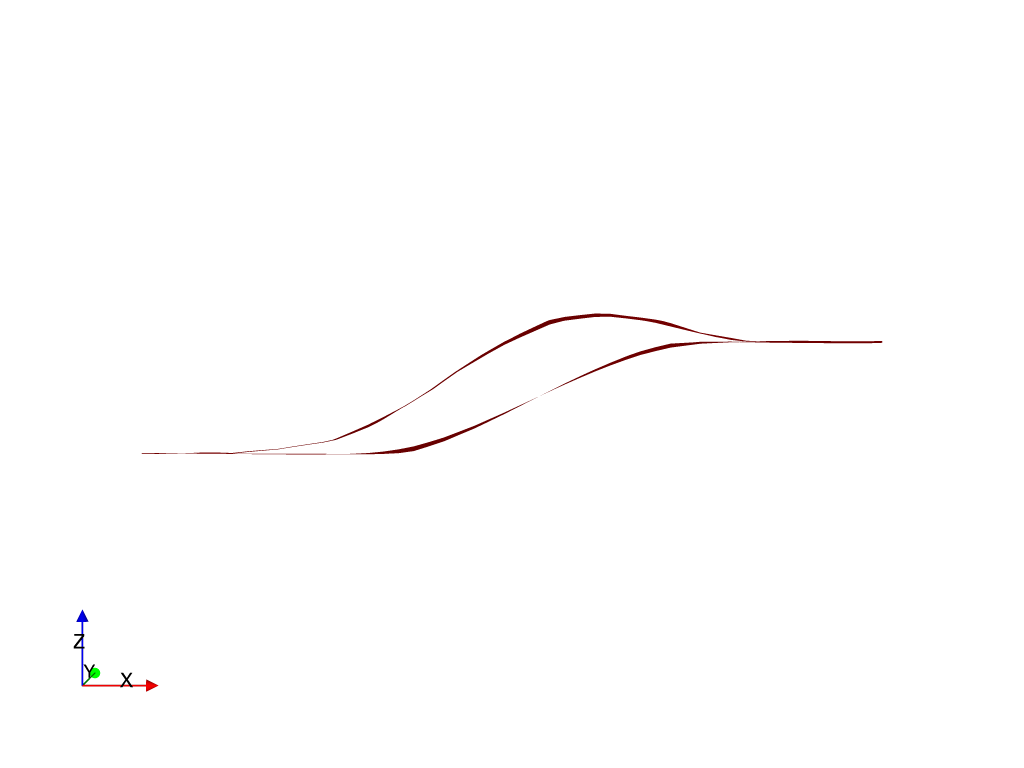

'fault_network.png'

In [17]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(fault1,
#                       slices=[-1,0,1],
                      isovalue=0,
                     )
viewer.add_isosurface(fault2,
                      isovalue=0
                     )
# viewer.add_isosurface(fault2['feature'],
# #                       slices=[-1,0,1],
#                       isovalue=0,
# #                       voxet=model.voxet((50,3,20)),
#                       name='t'
#                      )
# viewer.add_isosurface(fault1['feature'],
# #                       slices=[-1,0,1],
#                       isovalue=0,
# #                       voxet=model.voxet((50,3,20)),
#                       name='t3'
#                      )
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1

viewer.lv['border'] = 0

viewer.lv.display()
viewer.lv.image('fault_network.png')

### Figure showing faulted strati


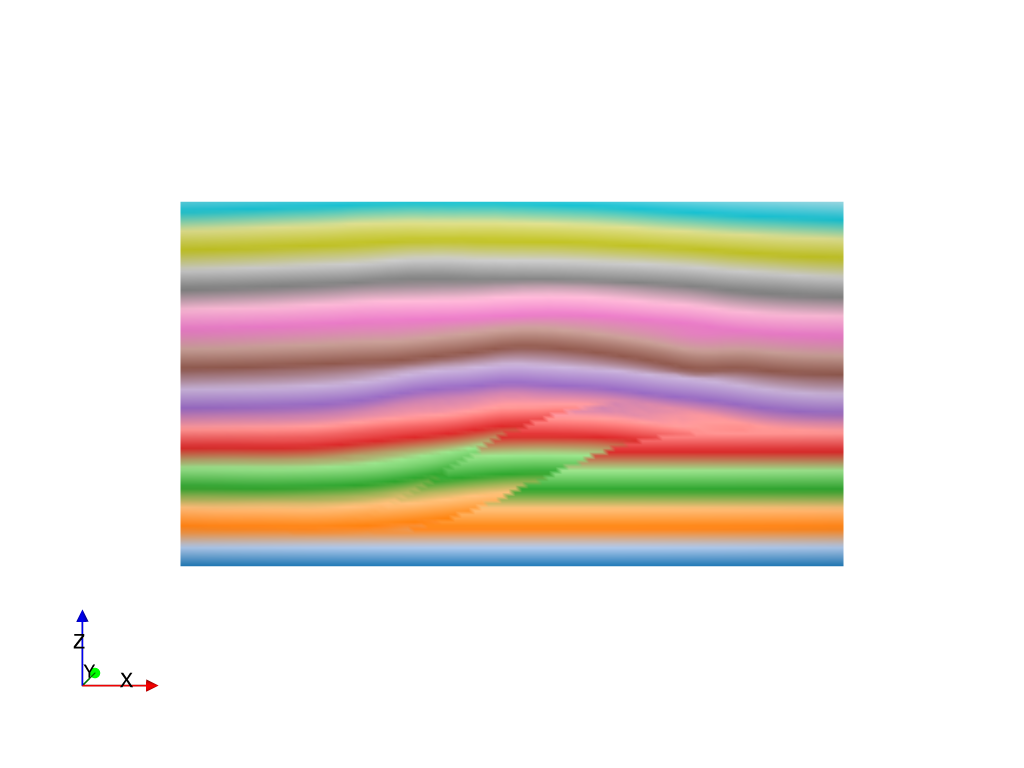

In [18]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,20,100])
# viewer.add_vector_field(strati['feature'])#,locations=nodes2)#,model.regular_grid((25,25,12)))

viewer.add_scalar_field(strati,cmap='tab20')
viewer.lv.rotatex(-90)
viewer.lv['xmin'] = -1
viewer.lv['ymin'] = -1
viewer.lv['zmin'] = -1
viewer.lv['xmax'] = 1
viewer.lv['ymax'] = 1
viewer.lv['zmax'] = 1
viewer.lv['border'] = 0
viewer.lv.image('fault_duplex_scalar_field.png')
viewer.lv.display()

### Add all of the plots to a matplotlib figure

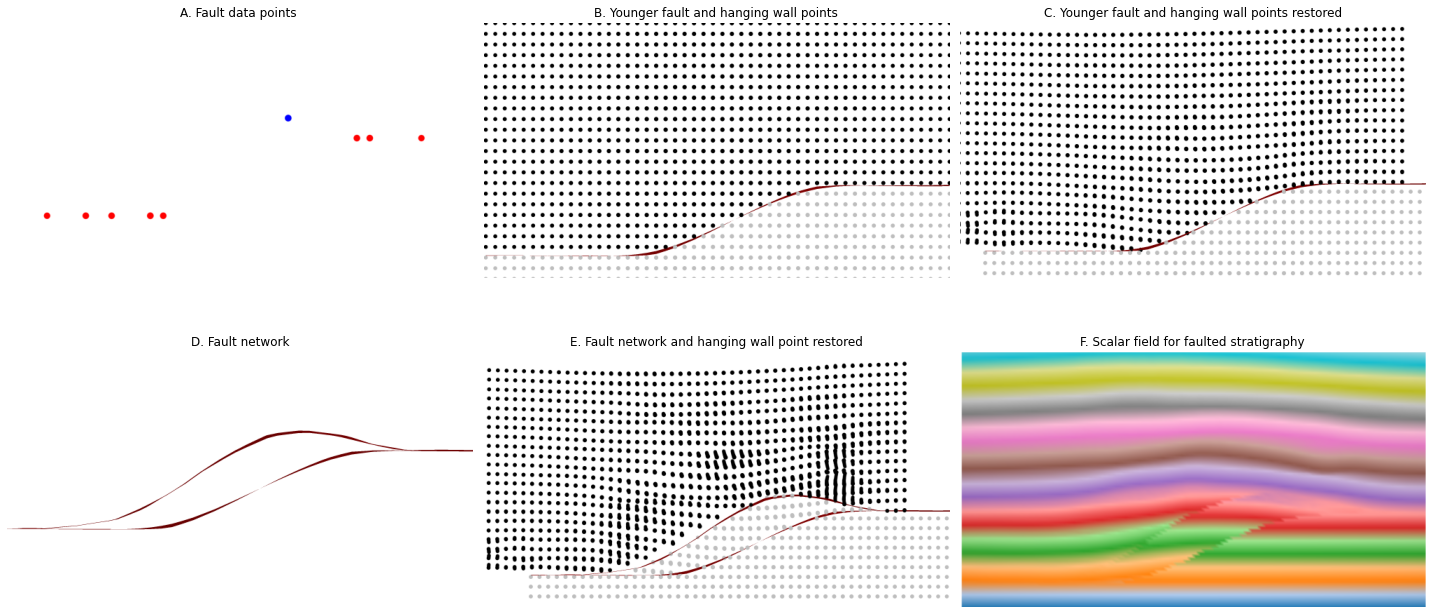

In [22]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0,0].imshow(plt.imread('fault_data.png')[200:565, 178:844,:])
ax[0,0].set_title('A. Fault data points ')
ax[0,1].imshow(plt.imread('points_before_fault.png')[200:565, 178:844,:])
ax[0,1].set_title('B. Younger fault and hanging wall points')
ax[0,2].imshow(plt.imread('fault1_point_displaced.png')[200:565, 178:844,:])
ax[0,2].set_title('C. Younger fault and hanging wall points restored')
ax[1,0].imshow(plt.imread('fault_network.png')[200:565, 178:844,:])
ax[1,0].set_title('D. Fault network')
ax[1,1].imshow(plt.imread('points_both_fault.png')[200:565, 178:844,:])
ax[1,1].set_title('E. Fault network and hanging wall point restored')
ax[1,2].imshow(plt.imread('fault_duplex_scalar_field.png')[200:565, 178:844,:])
ax[1,2].set_title('F. Scalar field for faulted stratigraphy')

for i in range(2):
    for j in range(3):
        ax[i,j].axis('off')
plt.tight_layout()
# plt.